In [8]:
from datetime import datetime
from matplotlib.pyplot import xticks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import eval_functions as ef
import dataretrieval.nwis as nwis
# import plot_functions as pf

In [9]:
# User variables:
# forecast_week: the week number that you are judging.
#                Use number for week that just ended,
#                found in Forecst_Dates.csv 

forecast_week = 10

In [10]:
station_id = "09506000"

# get list of students in the class using functions
names = ef.getLastNames()
firstnames = ef.getFirstNames()
nstudent = len(names)

In [11]:
# Read in everyone's forecast entries
forecasts1 = np.zeros(nstudent)  # 1 wk forecasts for this week
forecasts2 = np.zeros(nstudent)  # 2 wk forecasts for this week

for i in range(nstudent):
    # i = 0
    filename = names[i] + '.csv'
    filepath = os.path.join('..', 'forecast_entries', filename)
    print(filepath)
    temp = pd.read_csv(filepath, index_col='Forecast #')
    forecasts1[i] = temp.loc[(forecast_week), '1week']
    forecasts2[i] = temp.loc[(forecast_week - 1), '2week']

print('student forecasts read')

..\forecast_entries\Bettis.csv
..\forecast_entries\Boyd.csv
..\forecast_entries\Dyer.csv
..\forecast_entries\Giralte.csv
..\forecast_entries\Hoopes.csv
..\forecast_entries\Morales.csv
..\forecast_entries\Schlottman.csv
..\forecast_entries\Serrano.csv
..\forecast_entries\XiZhang.csv
..\forecast_entries\XuZhang.csv
..\forecast_entries\Zhong.csv
student forecasts read


In [12]:
# Read in the streamflow data and get the weekly average
#reformat the start and end dates to the required USGS format: yyyy-mm-dd

#Read in the previous weekly streamflow observations
filepath = os.path.join('../weekly_results',
                        'weekly_observations.csv')
obs_table = pd.read_csv(filepath, index_col='forecast_week')


# get start and end date of forecast week for 1 wk forecast
week_date = ef.weekDates(forecast_week)
start_date = week_date[0]
stop_date = week_date[1]
start_formatted = week_date[2]
stop_formatted = week_date[3]

#Get the flow from the USGS database
obs_day = nwis.get_record(sites=station_id, service='dv',
                    start=start_formatted, end=stop_formatted,
                    parameterCd='00060')

#convert to weekly 
obs_week = np.mean(obs_day['00060_Mean'])

#Write the values to the observation table
obs_table.loc[forecast_week, 'observed'] = np.round(obs_week, 3)
obs_table.loc[forecast_week, 'start_date'] = start_date
obs_table.loc[forecast_week, 'end_date'] = stop_date
obs_table.to_csv(filepath, index_label='forecast_week')

print("Evaluating forecasts for", start_date, 'To', stop_date)
print('Average streamflow for this week:', np.round(obs_week, 3))

# calculate difference between student forecasts and reality
dif1 = abs(forecasts1 - obs_week)
dif2 = abs(forecasts2 - obs_week)

Evaluating forecasts for 10/31/2021 To 11/6/2021
Average streamflow for this week: 131.833


In [13]:
# Make a data frame for the results
summary = pd.DataFrame({'start': start_date, 'end': stop_date,
                        'observation': obs_week,
                        '1week_forecast': forecasts1,
                        '1week_difference': dif1,
                        '2week_forecast': forecasts2,
                        '2week_difference': dif2},
                       index=firstnames)

# Rank the forecasts
summary['1week_ranking'] = summary['1week_difference'].rank(ascending=True,
                                                            method='dense',
                                                            na_option='bottom')
summary['2week_ranking'] = summary['2week_difference'].rank(ascending=True,
                                                            method='dense',
                                                            na_option='bottom')


# Add points for the 1 week forecasts
summary['1week_points'] = np.zeros(nstudent)
summary.loc[summary['1week_ranking'] == 1, '1week_points'] = 2
summary.loc[summary['1week_ranking'] == 2, '1week_points'] = 1
summary.loc[summary['1week_ranking'] == 3, '1week_points'] = 1

# Add points for the 2 week forecasts
summary['2week_points'] = np.zeros(nstudent)
summary.loc[summary['2week_ranking'] == 1, '2week_points'] = 2
summary.loc[summary['2week_ranking'] == 2, '2week_points'] = 1
summary.loc[summary['2week_ranking'] == 3, '2week_points'] = 1

In [14]:
# Write out the reults
filename_out = 'forecast_week' + str(forecast_week) + '_results.csv'
filepath_out = os.path.join('..', 'weekly_results', filename_out)
summary.to_csv(filepath_out, index_label='name')

In [15]:
# print a summary
print ('Scoring forecasts for week', forecast_week, ':', start_date, '-', stop_date)
print('Observed Flow =', round(obs_week, 3))

print('1 Week Forecast')
print('First Place = ', list(summary.loc[summary['1week_ranking'] == 1].index),
      'flow forecast = ', summary.loc[summary['1week_ranking'] == 1,
                                      '1week_forecast'].head(1).values)
print('Second Place = ', list(summary.loc[summary['1week_ranking'] == 2].index),
      'flow forecast = ', summary.loc[summary['1week_ranking'] == 2,
                                      '1week_forecast'].head(1).values)
print('Third Place = ', list(summary.loc[summary['1week_ranking'] == 3].index),
      'flow forecast = ', summary.loc[summary['1week_ranking'] == 3,
                                      '1week_forecast'].head(1).values)

print('2 Week Forecast')
print('First Place = ', list(summary.loc[summary['2week_ranking'] == 1].index),
      'flow forecast = ', summary.loc[summary['2week_ranking'] == 1,
                                      '2week_forecast'].head(1).values)
print('Second Place = ', list(summary.loc[summary['2week_ranking'] == 2].index),
      'flow forecast = ', summary.loc[summary['2week_ranking'] == 2,
                                      '2week_forecast'].head(1).values)
print('Third Place = ', list(summary.loc[summary['2week_ranking'] == 3].index),
      'flow forecast = ', summary.loc[summary['2week_ranking'] == 3,
                                      '2week_forecast'].head(1).values)

Scoring forecasts for week 10 : 10/31/2021 - 11/6/2021
Observed Flow = 131.833
1 Week Forecast
First Place =  ['Gigi'] flow forecast =  [131.5]
Second Place =  ['Andrew'] flow forecast =  [135.]
Third Place =  ['Kevin'] flow forecast =  [128.]
2 Week Forecast
First Place =  ['Gigi'] flow forecast =  [134.]
Second Place =  ['Connal'] flow forecast =  [140.]
Third Place =  ['Kevin'] flow forecast =  [117.5]


C:\Users\amfun\AppData\Local\Temp/ipykernel_18028/2397164906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(firstnames, rotation=60)


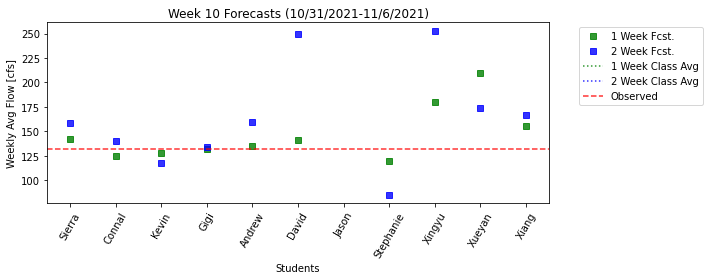

In [16]:
# Plot the forecasts for this week
#calcualte the class averages for plotting
class_avg1 = np.mean(forecasts1)
class_avg2 = np.mean(forecasts2)

#setup the figure
fig3, ax = plt.subplots()
fig3.set_size_inches(10, 4)

#plot the data
ax.plot(firstnames, forecasts1, 'sg', label='1 Week Fcst.', alpha=.8)
ax.plot(firstnames, forecasts2, 'sb', label='2 Week Fcst.', alpha=.8)
ax.axhline(y=class_avg1, linestyle='dotted',
      label='1 Week Class Avg', alpha=.8, color='green')
ax.axhline(y=class_avg2, linestyle='dotted',
           label='2 Week Class Avg', alpha=.8, color='blue')
ax.axhline(y=obs_week, linestyle='dashed', label='Observed',
            alpha=.8, color='red')

#Set the titles and labels 
title_string = 'Week ' + str(forecast_week) + ' Forecasts (' + start_date + '-' + stop_date + ')'
ax.set(title=title_string, xlabel="Students",
       ylabel="Weekly Avg Flow [cfs]")
ax.set_xticklabels(firstnames, rotation=60)
#ax.legend(fancybox=True, framealpha=1, shadow=True,
#          borderpad=1)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig3.patch.set_facecolor('xkcd:white')
plt.tight_layout()
plt.show()

# Save the plot to a file
filename = 'Forecast_Summary_week' + str(forecast_week) + '.png'
filepath = os.path.join('../weekly_plots', filename)
fig3.savefig(filepath)